In [1]:
import pandas as pd
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [2]:
dataFrame.tail(2)

,Fiyat,BisikletOzellik1,BisikletOzellik2
998,705.802257,1751.349290,1747.484989
999,1048.892414,1748.656426,1752.539962


c:\Users\borte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


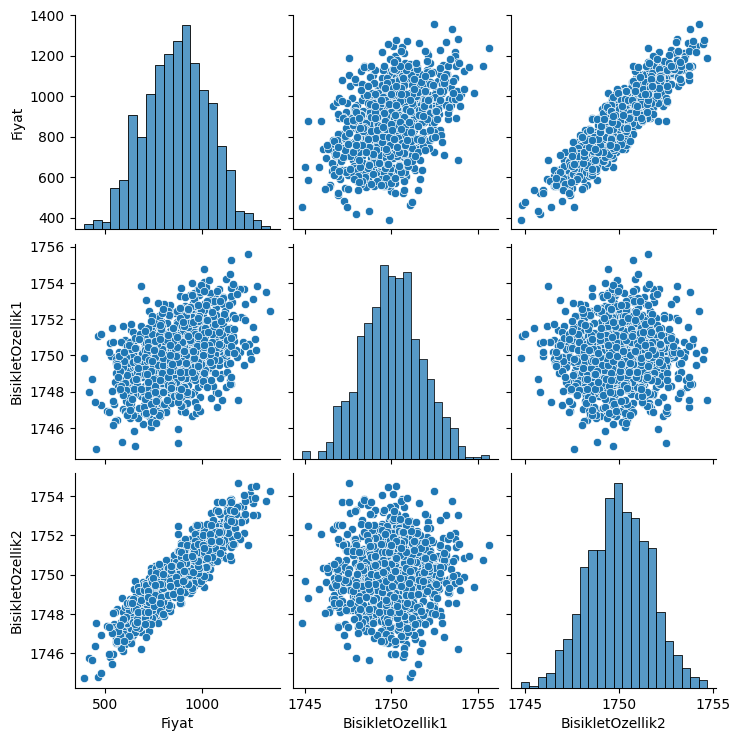

In [3]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.pairplot(dataFrame)

<h3>Veriyi test/train olarak ikiye ayırmak</h3>

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [6]:
xTrain, xTest, yTrain, yTest =train_test_split(x,y,test_size=0.33,random_state=15)

<h3>Scaling, normalize etme</h3>

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xTrain)

MinMaxScaler()

In [8]:
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)


In [9]:
xTrain

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [10]:
import tensorflow as tf
from keras.models import Sequential
from  keras.layers import Dense

import keras
model = Sequential() 
model.add(Dense(4, activation="relu",)) # katmanlar ekleniyor
model.add(Dense(6,activation= "relu"))
model.add(Dense(5 , activation= "relu"))
model.add(Dense(1))


In [11]:
model.compile(optimizer="rmsprop",loss="mse") # optimization ve loss function ?

In [12]:
model.fit(xTrain,yTrain,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 797980.9375   
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 804795.5625 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 795830.1250
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 797506.6875
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 798438.5000
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 814289.8125
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 786979.4375
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 782061.3125
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 796790.8750
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 793467.5000
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 771654.5000
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 792206.5625
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 794255.8750
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 904u

In [13]:
loss = model.history.history["loss"] 

<Axes: >

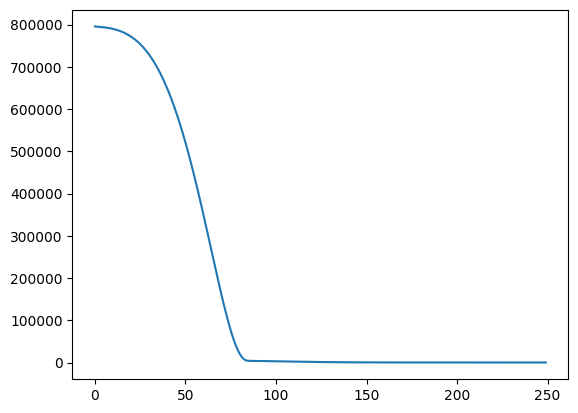

In [14]:
sbn.lineplot(x=range(len(loss)),y =loss)  # Loss 'un son durum grafiği

In [15]:
trainLoss = model.evaluate(xTrain,yTrain)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 71.2904


In [16]:
testLoss = model.evaluate(xTest,yTest) # Evaulate nedir ?

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 73.9513


In [17]:
testTahminleri = model.predict(xTest) # tehmin etme kısmı

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [18]:
testTahminleri

array([[1077.4336 ],
       [ 623.33075],
       [ 875.6928 ],
       [ 893.75946],
       [ 899.0131 ],
       [ 450.9016 ],
       [ 930.7171 ],
       [ 991.01825],
       [ 940.83014],
       [1016.3897 ],
       [ 750.4835 ],
       [ 917.4866 ],
       [ 947.06036],
       [1054.3365 ],
       [1121.1461 ],
       [ 681.0683 ],
       [1126.5853 ],
       [ 650.3888 ],
       [1154.2125 ],
       [ 886.1236 ],
       [ 892.3901 ],
       [ 716.34015],
       [ 456.3558 ],
       [ 611.4706 ],
       [ 834.5839 ],
       [1090.8676 ],
       [ 713.28986],
       [ 756.40765],
       [ 873.0173 ],
       [ 770.14874],
       [ 450.70178],
       [ 782.6232 ],
       [ 727.80536],
       [ 646.2912 ],
       [ 886.2928 ],
       [ 843.3536 ],
       [1035.3661 ],
       [1022.3923 ],
       [ 844.50323],
       [ 861.7713 ],
       [ 756.68475],
       [1174.2283 ],
       [1097.2559 ],
       [1087.4672 ],
       [ 872.7835 ],
       [ 596.1143 ],
       [1145.3624 ],
       [ 972.

In [19]:

tahminDf = pd.DataFrame(yTest,columns=["Gerçek_Y"])

In [20]:
tahminDf

,Gerçek_Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [21]:
testTahminleri = pd.Series(testTahminleri.reshape(330,)) #reshape

In [22]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [23]:
tahminDf

,Gerçek_Y,0
0,1081.652164,1077.433594
1,622.675990,623.330750
2,889.356810,875.692810
3,902.826733,893.759460
4,897.662404,899.013123
...,...,...
325,1028.438035,1013.185730
326,789.934950,790.327942
327,758.490486,765.519958
328,1172.871659,1167.272339


In [24]:
tahminDf.columns =["Gerçek_y","Tahmin_Y"]

<Axes: xlabel='Gerçek_y', ylabel='Tahmin_Y'>

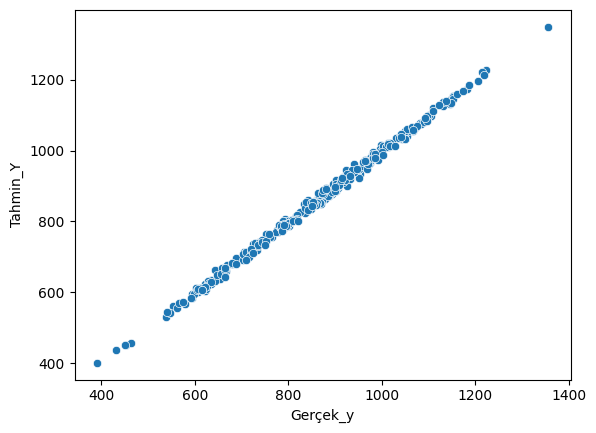

In [29]:
sbn.scatterplot(x = "Gerçek_y",y = "Tahmin_Y",data = tahminDf)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mean_absolute_error(tahminDf["Gerçek_y"],tahminDf["Tahmin_Y"])  # prediction hatası
# Bisiklet fiyatlarındaki sapma miktarı

7.076352392122394

<h4>Yeni Verilerle Tahmin</h4>

In [45]:
yeniBisiklet = [[1760,1750]] # Yeni verilerle tahmin yapma 
yeniBisiklet = scaler.transform(yeniBisiklet)

In [46]:
model.predict(yeniBisiklet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1275.1676]], dtype=float32)

<h4>Model Kaydetme Ve Yükleme</h4>

In [49]:
from keras.models import load_model
model.save("bisiklet_model.keras")

In [51]:
loadModel = load_model("bisiklet_model.keras")

In [52]:
loadModel.predict(yeniBisiklet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1275.1676]], dtype=float32)